In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from matplotlib.patches import Ellipse

In [2]:
# 讀取文件
with open('./asset/creditcard.dat', 'r') as file:
    lines = file.readlines()

# 讀取維度和資料數
dimensions = lines[0].strip().split(',')
num_samples = int(dimensions[0])
num_features = int(dimensions[1])

# 提取數據
data = []
for line in lines[1:]:
    if line.strip():
        data.append(list(map(float, line.strip().split(','))))

data = np.array(data)
X = data[:, :-1]  # 提取特徵
y = data[:, -1].astype(int)  # 提取標籤

# 確保標籤是整數編碼
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

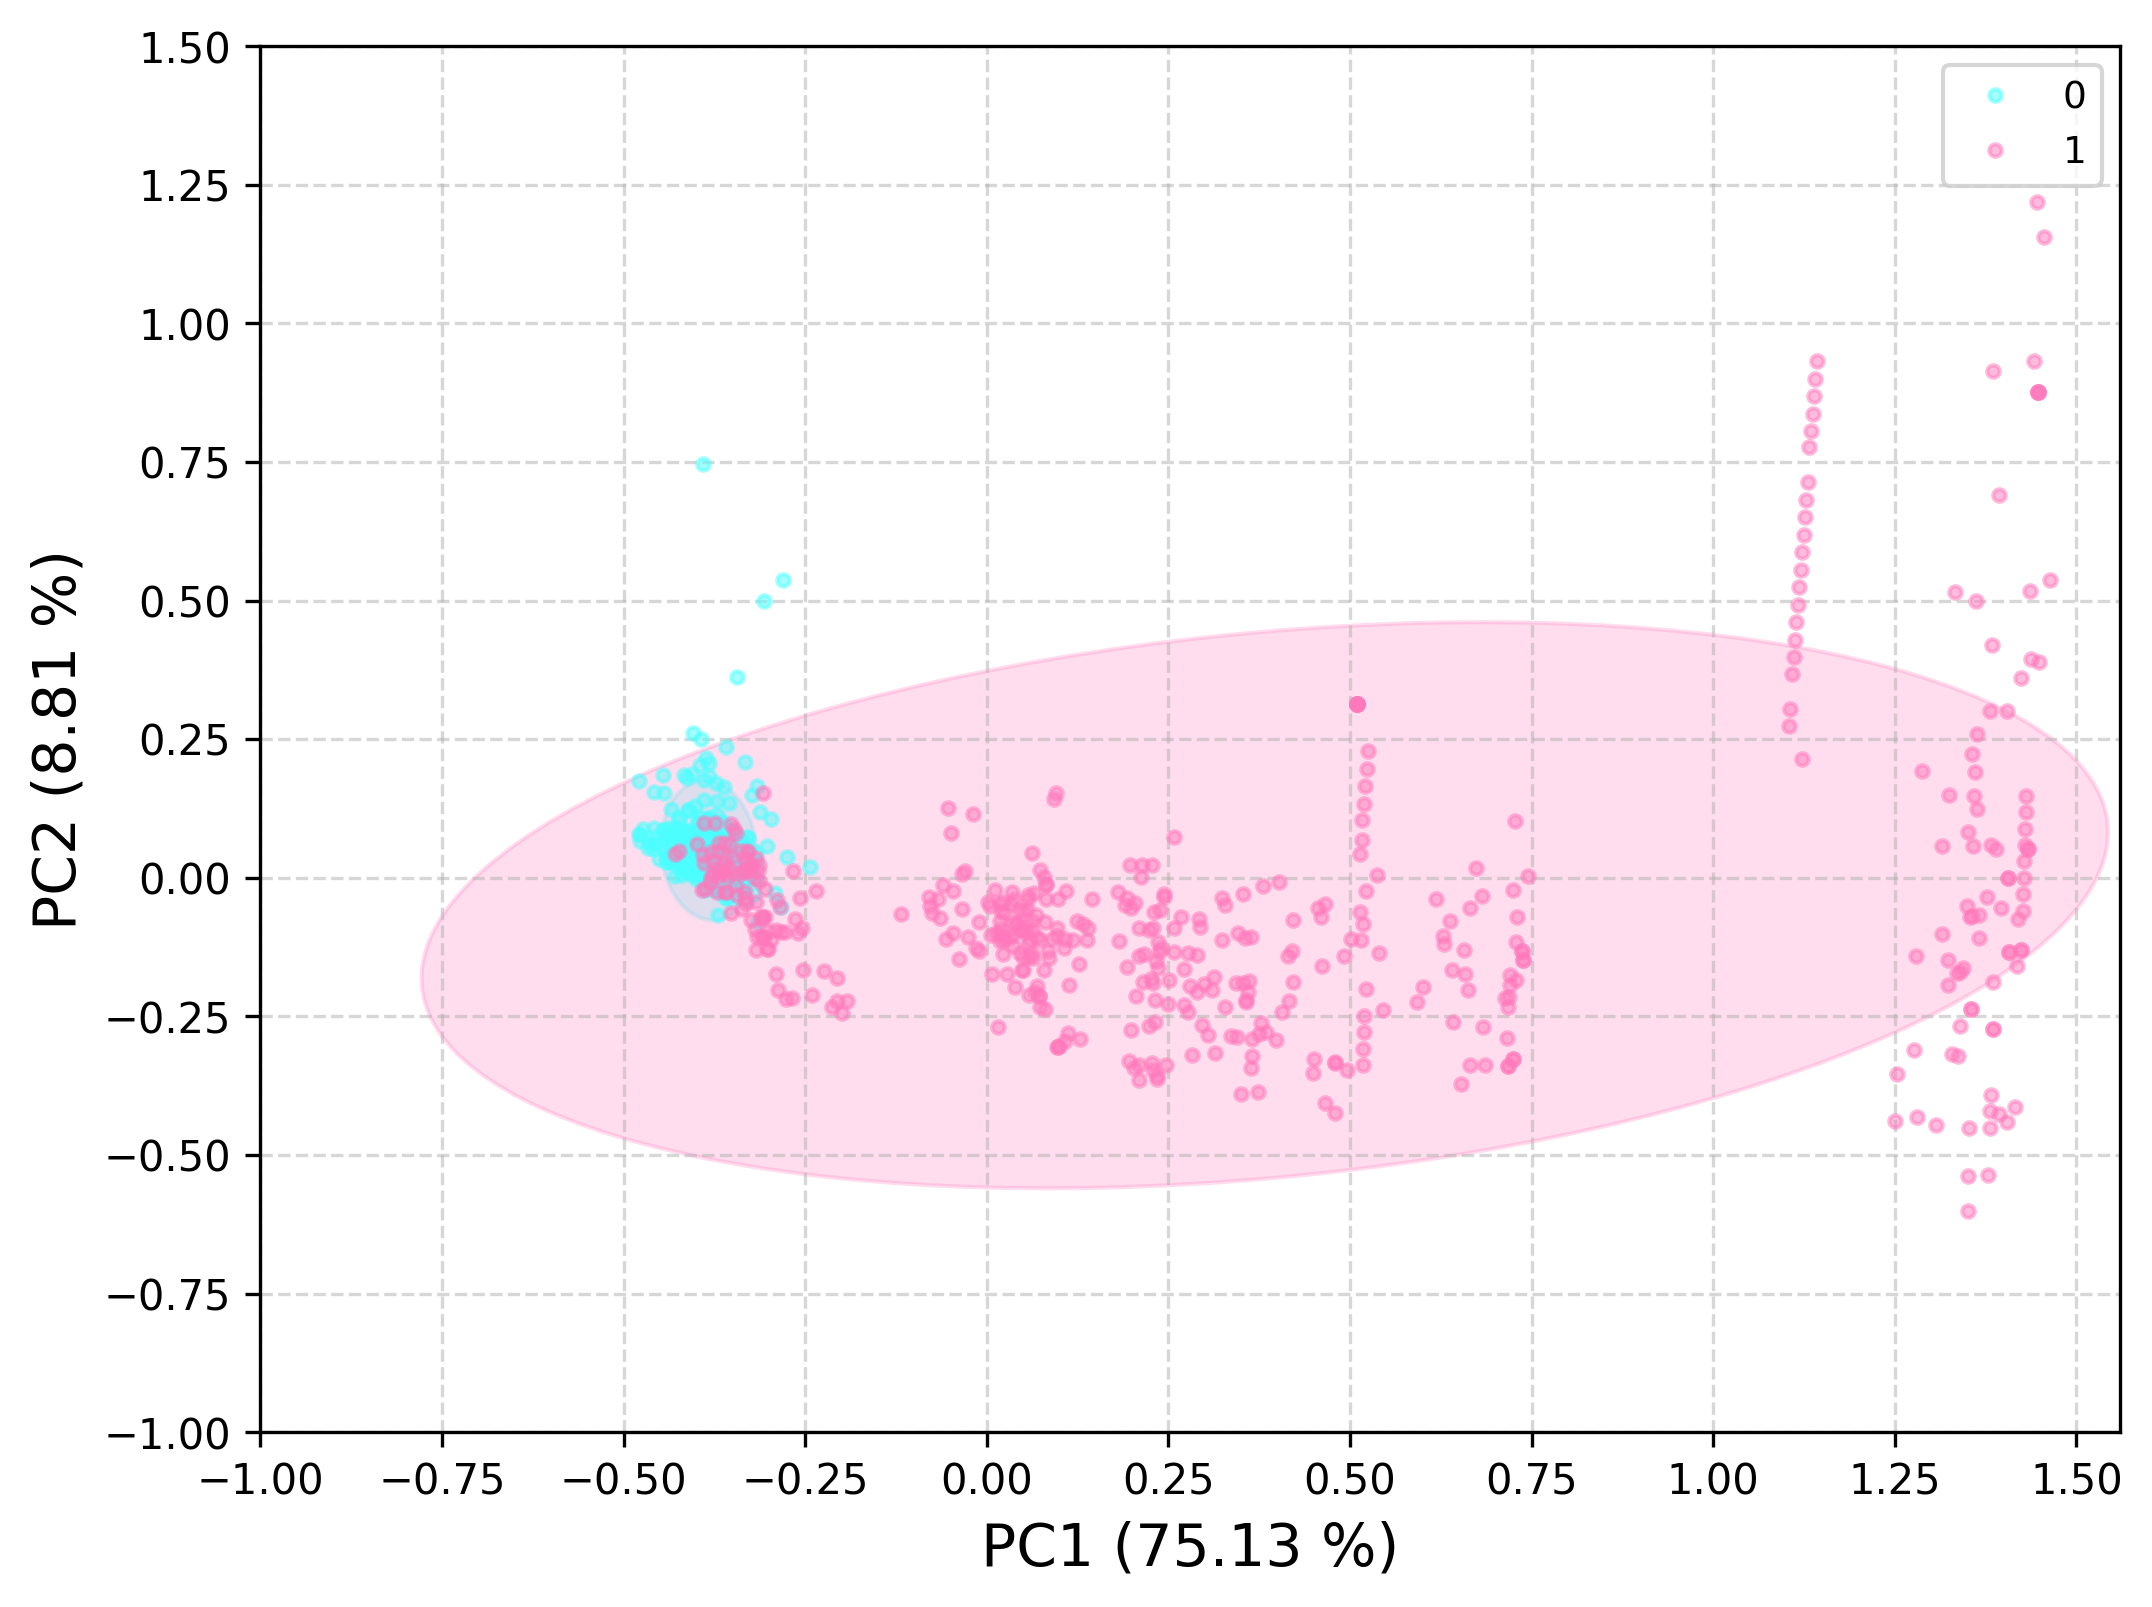

In [3]:
def plot_point_cov(points, nstd=3, ax=None, **kwargs):
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=3, ax=None, **kwargs):
    def eigsorted(cov):
        cov = np.array(cov)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ax.add_artist(ellip)
    return ellip

def show_ellipse(X_pca, y, pca, flag=1):
    colors = ['#4DFFFF', '#FF79BC']
    regions = ['0', '1']
    plt.figure(dpi=300, figsize=(8, 6))
    for i in range(len(regions)):
        pts = X_pca[y == int(i), :]
        new_x, new_y = X_pca[y == i, 0], X_pca[y == i, 1]
        plt.plot(new_x, new_y, '.', color=colors[i], alpha=0.5,label=regions[i])
        plot_point_cov(pts, nstd=2, alpha=0.25, color=colors[i])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(np.arange(-1, 1.6, 0.25), size=10)
    plt.yticks(np.arange(-1, 1.6, 0.25), size=10)
    font = {'size': 14}
    plt.xlabel('PC1 ({} %)'.format(round(pca.explained_variance_ratio_[0] * 100, 2)), font)
    plt.ylabel('PC2 ({} %)'.format(round(pca.explained_variance_ratio_[1] * 100, 2)), font)
    plt.legend(prop={"size": 9}, loc='upper right')
    plt.show()

# PCA降維
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# 顯示結果
show_ellipse(X_pca, y, pca)


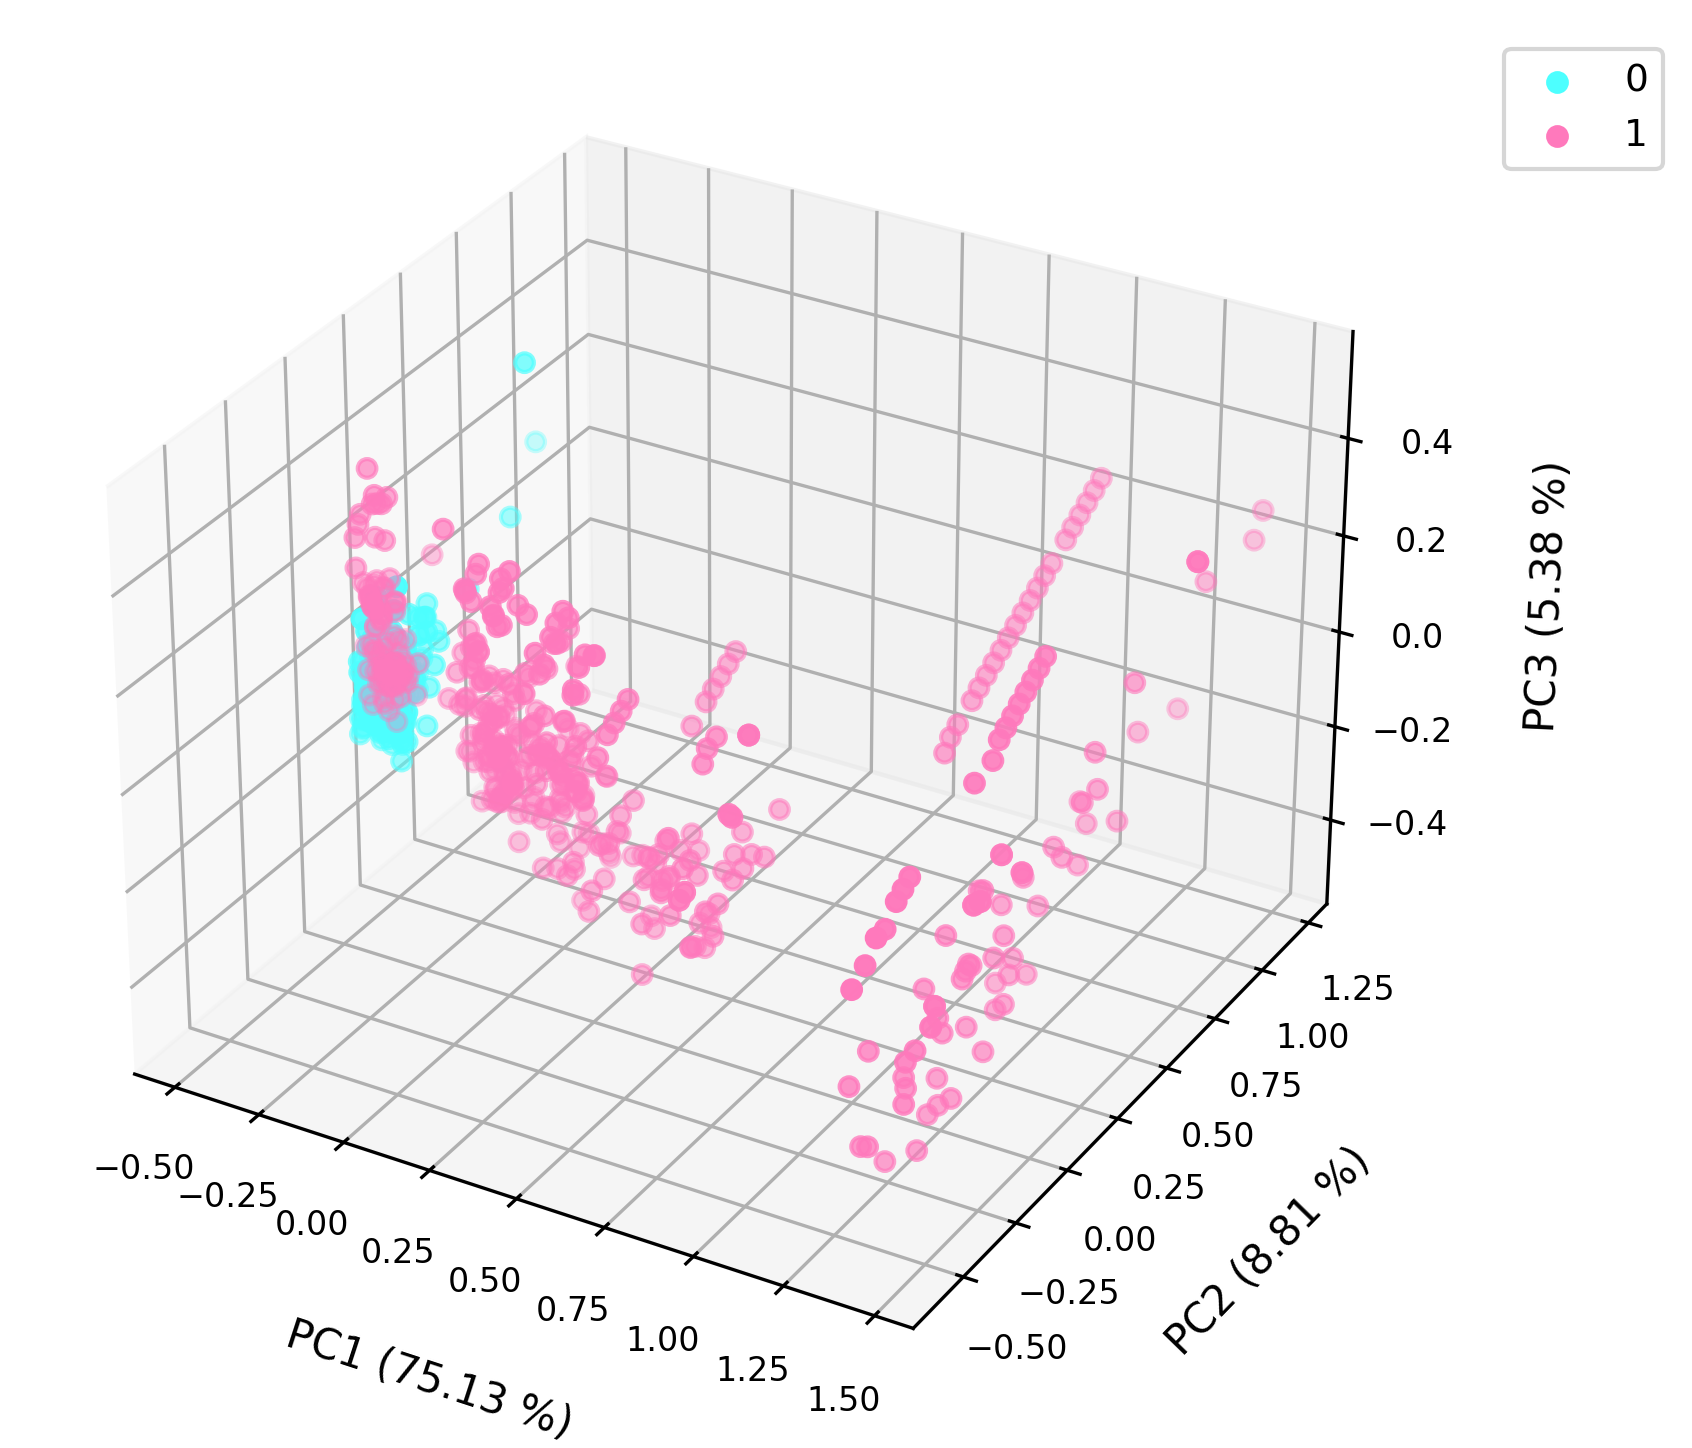

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def show_ellipse(X_pca, y, pca, flag=1):
    colors = ['#4DFFFF', '#FF79BC']
    regions = ['0', '1']
    
    fig = plt.figure(dpi=300, figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for i in range(len(regions)):
        pts = X_pca[y == int(i), :]
        ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], '.', color=colors[i], label=regions[i])
    
    ax.set_xlabel('PC1 ({} %)'.format(round(pca.explained_variance_ratio_[0] * 100, 2)), fontsize=10, labelpad=10)
    ax.set_ylabel('PC2 ({} %)'.format(round(pca.explained_variance_ratio_[1] * 100, 2)), fontsize=10, labelpad=10)
    ax.set_zlabel('PC3 ({} %)'.format(round(pca.explained_variance_ratio_[2] * 100, 2)), fontsize=10, labelpad=10)
    
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    
    plt.legend(prop={"size": 9}, loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

# PCA降維到3維
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# 顯示結果
show_ellipse(X_pca, y, pca)
